# Exercise 5: Observation model


## 5.1 Implement model for perceiving landmarks

Consider a robot that operates in an environment populated by **range-only** sensors such as _beacons_.
These sensors transmit a signal that allows for obtaining noisy measurements of their distance from a receiver mounted on the robot.

The function `landmark_observation_model` realizes the observation model for perceiving landmarks with a range sensor. It takes as input:
 
- the observed noisy range $z$
- the standard deviation of the measurement $\sigma_z$ (zero-mean Gaussian noise)
- the position of the robot in the map $x$
- the position of the beacon transmitting beacon in the map $m$

The output of this function is the probability $p(z | x, m)$ that the measurement $z$ was obtained at position $x$.

Implement the `landmark_observation_model` function and verify that it is correct for some test input. **[2.0]**

[[5.05227108e-15 9.13472041e-12 6.07588285e-09 1.48671951e-06
  1.33830226e-04 4.43184841e-03 5.39909665e-02 2.41970725e-01
  3.98942280e-01 2.41970725e-01]]


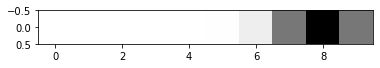

In [6]:
from ex5 import *
import numpy as np
gridmap = np.zeros((1,10))
# print(gridmap)
z = 8
# x = [0,0]
sigma =1
m =[0,0]
for i in range(gridmap.shape[1]):
    # print(landmark_observation_model(z,[0,i],m,sigma))
    gridmap[0][i] = landmark_observation_model(z,[0,i],m,sigma)

print(gridmap)
plot_map(gridmap)



---

## 5.2 Compute likelihood of measurement in the environment

The robot operates in an environment that is represetend by a 20x20 grid map and contains a beacon at position $m_1 = [0,0]$ (top-left corner). 

The robot obtains a range measurement of the beacon $z_1 = 10$ and the sensor noise is $\sigma_{z1} = 1$.

Compute the `landmark_observation_model` at each cell of the environment and plot the likelihood of the observation over the environment. **[1.0]** 

[[7.69459863e-23 1.02797736e-18 5.05227108e-15 9.13472041e-12
  6.07588285e-09 1.48671951e-06 1.33830226e-04 4.43184841e-03
  5.39909665e-02 2.41970725e-01 3.98942280e-01 2.41970725e-01
  5.39909665e-02 4.43184841e-03 1.33830226e-04 1.48671951e-06
  6.07588285e-09 9.13472041e-12 5.05227108e-15 1.02797736e-18]
 [1.02797736e-18 3.92412608e-17 3.24765288e-14 2.80744296e-11
  1.26212709e-08 2.42726998e-06 1.85712045e-04 5.47118300e-03
  6.10317505e-02 2.55358420e-01 3.98446389e-01 2.31002127e-01
  4.96382911e-02 3.94664105e-03 1.15961762e-04 1.25801591e-06
  5.03554983e-09 7.43312410e-12 4.04467675e-15 8.11045636e-19]
 [5.05227108e-15 3.24765288e-14 2.70838856e-12 5.27208095e-10
  9.23593414e-08 9.47086360e-06 4.65040839e-04 9.87410465e-03
  8.57065505e-02 2.94200444e-01 3.91195337e-01 1.98783366e-01
  3.82470851e-02 2.76843208e-03 7.50330184e-05 7.58836856e-07
  2.85617201e-09 3.99286999e-12 2.06998348e-15 3.97454382e-19]
 [9.13472041e-12 2.80744296e-11 5.27208095e-10 2.52982235e-08
  1.4

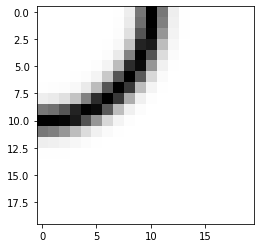

In [7]:
gridmap = np.zeros((20,20))
m =[0,0]
z= 10
sigma = 1
for i in range(gridmap.shape[0]):
    for j in range(gridmap.shape[1]):
        gridmap[i][j] = landmark_observation_model(z,[i,j],m,sigma)
print(gridmap)
plot_map(gridmap)

---

## 5.3 Multiple landmarks

Assume that we install two **additional** beacons in our environment:

- $m_2 = [0, 10]$
- $m_3 = [10, 0]$

from which we obtain the following observations:

- $z_2 = 5$ with $\sigma_{z2} = 3$
- $z_3 = 9$ with $\sigma_{z3} = 2$

Compute the `landmark_observation_model` at each cell of the environment considering the measurements from **all** beacons and plot the **joint** likelihood of the observations over the environment. **[2.0]** 

[[5.83707523e-03 9.50150305e-03 1.34463347e-02 1.63886032e-02
  1.69591044e-02 1.46418445e-02 1.03485531e-02 5.87465101e-03
  2.63051018e-03 9.13825139e-04 2.42691305e-04 1.47767459e-04
  6.71546094e-05 2.25649000e-05 5.56102347e-06 9.98327272e-07
  1.29799226e-07 1.21623323e-08 8.17883753e-10 3.93322360e-11]
 [6.43262680e-03 1.06340422e-02 1.56602531e-02 2.02914028e-02
  2.27125326e-02 2.14933126e-02 1.68250821e-02 1.06914279e-02
  5.45918694e-03 2.28557488e-03 9.13825139e-04 4.34874129e-04
  1.92764135e-04 6.66112963e-05 1.71263485e-05 3.21959185e-06
  4.38345237e-07 4.29461833e-08 3.01330634e-09 1.50844688e-10]
 [5.21755715e-03 8.83796555e-03 1.37584869e-02 1.93617473e-02
  2.40530372e-02 2.56959789e-02 2.30493765e-02 1.70801975e-02
  1.04539295e-02 5.45918694e-03 2.63051018e-03 1.23000804e-03
  5.17417748e-04 1.76373936e-04 4.58581926e-05 8.82538518e-06
  1.23692486e-06 1.25018719e-07 9.05259282e-09 4.67397887e-10]
 [3.10758091e-03 5.44444160e-03 9.12109896e-03 1.42746064e-02
  2.0

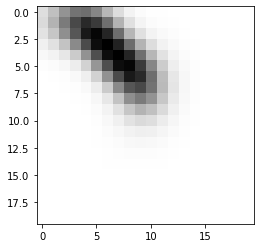

In [8]:
# since the measurements from both beacons are independent p(z|x,cell) = p(z|x1,cell)*p(z|x2,cell) where x1 and x2 are beacon positions
gridmap = np.ones((20,20))
m =np.array([[0,10],[10,0]])
obs= np.array([[5,3],[9,2]])
for i in range(gridmap.shape[0]):
    for j in range(gridmap.shape[1]):
        for k in range(m.shape[0]):
            gridmap[i][j] *= landmark_observation_model(obs[k][0],[i,j],m[k],obs[k][1])
print(gridmap)
plot_map(gridmap)